In [89]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [90]:
df= pd.read_csv('./train_clean.csv')

In [91]:
# sincere_df = df[df['target'] == 0]
# insincere_df = df[df['target'] == 1]

# # Determine the minimum number of rows between the sincere and insincere DataFrames
# min_rows = min(len(sincere_df), len(insincere_df), 9000)

# # Sample the sincere and insincere DataFrames separately using the minimum number of rows as the sample size
# sincere_sample = sincere_df.sample(n=min_rows, random_state=42).head(4500)
# insincere_sample = insincere_df.sample(n=min_rows, random_state=42).head(4500)

# # Concatenate the sampled sincere and insincere DataFrames into a single DataFrame
# sample_df = pd.concat([sincere_sample, insincere_sample])
# sample = sample_df
# # Print the number of rows for each class in the resulting sample DataFrame
# print(sample_df['target'].value_counts())
df = df.sample(frac=1, random_state=42)

# Separate sincere and insincere questions
sincere_questions = df[df['target'] == 0]
insincere_questions = df[df['target'] == 1]

# Sample 6000 sincere questions and 3000 insincere questions
sincere_sample = sincere_questions.sample(n=10000, random_state=42)
insincere_sample = insincere_questions.sample(n=6000, random_state=42)

# Concatenate the samples into a new dataframe
sample_df = pd.concat([sincere_sample, insincere_sample])

# Shuffle the rows in the new dataframe
sample_df = sample_df.sample(frac=1, random_state=42)
sample = sample_df

X = sample_df.drop('target', axis=1)
y = sample_df['target']
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Create a new dataframe with the oversampled data
resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
sample = resampled_df

In [92]:
X_train, X_test, y_train, y_test = train_test_split(sample['question_text'], sample['target'], test_size=0.2, random_state=42, stratify=sample['target'])

In [93]:
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


         best B = {'n_estimators': 160}
  validation R2 = 0.884


<Axes: xlabel='trees'>

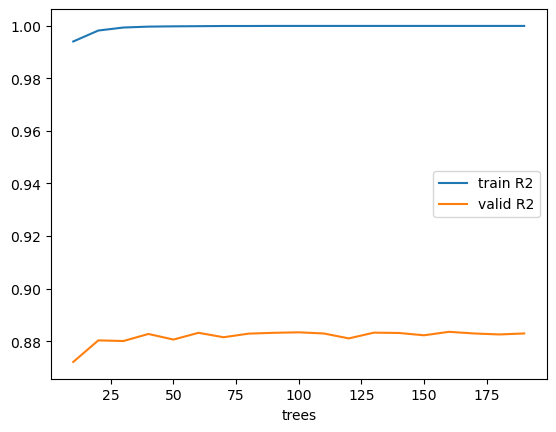

In [94]:
B = np.arange(10,200,10)
grid = {'n_estimators':B}

rf = RandomForestClassifier(class_weight='balanced')
rfCV = GridSearchCV(rf,param_grid=grid,return_train_score=True,n_jobs=-1)
rfCV.fit(X_train,y_train)
rf.fit(X_train,y_train)
print()
print('         best B =',rfCV.best_params_)
print('  validation R2 =',rfCV.best_score_.round(3))

results = pd.DataFrame()
results['trees'] = grid['n_estimators']
results['train R2'] = rfCV.cv_results_['mean_train_score']
results['valid R2']  = rfCV.cv_results_['mean_test_score']
results.plot.line(x='trees',y=['train R2','valid R2'])

In [95]:
rfc = RandomForestClassifier(n_estimators=180)

# fit the classifier on the training data
rfc.fit(X_train, y_train)

# predict on the test data
y_pred = rfc.predict(X_test)

# show the prediction score
print('Prediction score:', rfc.score(X_test, y_test))

Prediction score: 0.90625


In [96]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from time import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import nltk
import re
from sklearn import ensemble
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
nltk.download('punkt')
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package punkt to /home/zhengy9/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


              precision    recall  f1-score   support

           0       0.93      0.88      0.90      2000
           1       0.89      0.93      0.91      2000

    accuracy                           0.91      4000
   macro avg       0.91      0.91      0.91      4000
weighted avg       0.91      0.91      0.91      4000



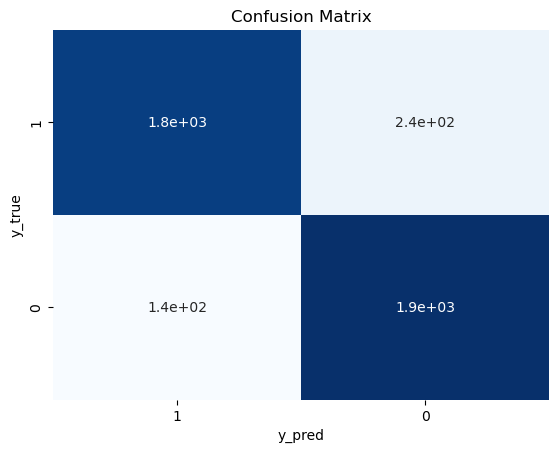

In [97]:
cm = metrics.confusion_matrix(y_test, y_pred)

ax = plt.gca()
sns.heatmap(cm, cmap='Blues', cbar=False, annot=True, xticklabels=y_test.unique(), yticklabels=y_test.unique(), ax=ax);
ax.set_xlabel('y_pred');
ax.set_ylabel('y_true');
ax.set_title('Confusion Matrix');

cr = metrics.classification_report(y_test, y_pred)
print(cr)

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_text

In [99]:
tree = rfc.estimators_[0]

In [100]:
dtree_string = export_text(tree,feature_names=list(vectorizer.get_feature_names_out()),decimals=1,spacing=5)
print(dtree_string)

|----- learning <= 0.5
|     |----- true <= 0.5
|     |     |----- white <= 0.5
|     |     |     |----- best <= 0.5
|     |     |     |     |----- blocked <= 0.5
|     |     |     |     |     |----- arabs <= 0.5
|     |     |     |     |     |     |----- western <= 0.5
|     |     |     |     |     |     |     |----- terrorist <= 0.5
|     |     |     |     |     |     |     |     |----- republicans <= 0.5
|     |     |     |     |     |     |     |     |     |----- worship <= 0.5
|     |     |     |     |     |     |     |     |     |     |----- skinned <= 0.5
|     |     |     |     |     |     |     |     |     |     |     |----- truncated branch of depth 1481
|     |     |     |     |     |     |     |     |     |     |----- skinned >  0.5
|     |     |     |     |     |     |     |     |     |     |     |----- class: 1.0
|     |     |     |     |     |     |     |     |     |----- worship >  0.5
|     |     |     |     |     |     |     |     |     |     |----- class: 1.0
|     |

In [101]:
tree = rfc.estimators_[1]

In [86]:
dtree_string = export_text(tree,feature_names=list(vectorizer.get_feature_names_out()),decimals=1,spacing=5)
print(dtree_string)

|----- experience <= 0.5
|     |----- whites <= 0.5
|     |     |----- evil <= 0.5
|     |     |     |----- study <= 0.5
|     |     |     |     |----- good <= 0.5
|     |     |     |     |     |----- believe <= 0.5
|     |     |     |     |     |     |----- christians <= 0.5
|     |     |     |     |     |     |     |----- isn <= 0.5
|     |     |     |     |     |     |     |     |----- learning <= 0.5
|     |     |     |     |     |     |     |     |     |----- dirty <= 0.5
|     |     |     |     |     |     |     |     |     |     |----- element <= 0.5
|     |     |     |     |     |     |     |     |     |     |     |----- truncated branch of depth 1316
|     |     |     |     |     |     |     |     |     |     |----- element >  0.5
|     |     |     |     |     |     |     |     |     |     |     |----- class: 0.0
|     |     |     |     |     |     |     |     |     |----- dirty >  0.5
|     |     |     |     |     |     |     |     |     |     |----- class: 1.0
|     |     | 

In [87]:
for i, tree in enumerate(rfc.estimators_):
    dtree_string = export_text(tree, feature_names=list(vectorizer.get_feature_names_out()), decimals=1, spacing=5)
    print("Decision Tree #{}:\n{}".format(i+1, dtree_string))

Decision Tree #1:
|----- ways <= 0.5
|     |----- java <= 0.5
|     |     |----- republicans <= 0.5
|     |     |     |----- superior <= 0.5
|     |     |     |     |----- liberal <= 0.5
|     |     |     |     |     |----- want <= 0.5
|     |     |     |     |     |     |----- fact <= 0.5
|     |     |     |     |     |     |     |----- deserve <= 0.5
|     |     |     |     |     |     |     |     |----- online <= 0.5
|     |     |     |     |     |     |     |     |     |----- dangerous <= 0.5
|     |     |     |     |     |     |     |     |     |     |----- best <= 0.5
|     |     |     |     |     |     |     |     |     |     |     |----- truncated branch of depth 1345
|     |     |     |     |     |     |     |     |     |     |----- best >  0.5
|     |     |     |     |     |     |     |     |     |     |     |----- truncated branch of depth 80
|     |     |     |     |     |     |     |     |     |----- dangerous >  0.5
|     |     |     |     |     |     |     |     |     | 